<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет,  Родион! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#RIDGE" data-toc-modified-id="RIDGE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>RIDGE</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

Импортируем необходимые библиотеки и создадим функции для дальнейшей работы.

In [1]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from catboost import CatBoostRegressor

from statsmodels.tsa.seasonal import seasonal_decompose

from collections import namedtuple

RANDOM_STATE = 131296

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

<div class="alert alert-info">
Добавил в импорты OHE и Pipeline
</div>

In [2]:
#создадим кортеж для дальнейшего использования со следующей информацией - время фиттинга, время предсказания и RMSE
ModelTimeAndRMSE = namedtuple('ModelTimeAndRMSE', ('fit_time', 'predict_time', 'rmse'))

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Красиво. </div>

In [3]:
#создадим функцию для первичного анализа
def first_analyze(data):
    rows, columns = data.shape
    print('='*50)
    print('Количество строк:', rows)
    print('Количество столбцов:', columns)
    display(data.head())
    display(data.describe())
    print(data.info())
    print('Индекс отсортирован в хронологическом порядке: ', data.index.is_monotonic)
    print('='*50)

In [4]:
#создадим функцию для создания графиков
def plot_time_series(data, title, xlabel, ylabel):
    data.plot(grid=True, legend=False, figsize=(11, 5), title=title)\
             .set(xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [5]:
#создадим функцию для получения времени обучения, времени предсказания и оценки и метрики RMSE для GridSearchCV

def get_model_time_and_rmse(model):
    fit_time = model.cv_results_['mean_fit_time'][model.best_index_]
    predict_time = model.cv_results_['mean_score_time'][model.best_index_]
    rmse = (-model.best_score_)**0.5
    return ModelTimeAndRMSE(fit_time, predict_time, rmse)

In [6]:
#создадим функцию для разделения данных в формате "фичи", "таргет"
def split_data(data, columns):
    return data.drop(columns=['num_orders']), data['num_orders']

In [7]:
#создадим пустой список в который будем в дальнейшем сохранять данные моделей
models_stats = []

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## Анализ

Загрузим данные с использованием столбца с датами в качестве индексов и проанализируем их.

In [8]:
taxi_data = pd.read_csv('/datasets/taxi.csv', index_col='datetime', parse_dates=True)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Отлично, при загрузке сразу обрабатываются даты</div>

In [9]:
first_analyze(taxi_data)

Количество строк: 26496
Количество столбцов: 1


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None
Индекс отсортирован в хронологическом порядке:  True


Данные представленны в хронологическом порядке, явных аномальных значений не выявлено, пропусков в данных нет.

Проведём почасовой ресемпл и проверим даты и время начала и окончания данных.

In [10]:
#почасовой ресемпл
taxi_data = taxi_data.resample('1H').sum()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, ресемплирование выполнено верно. И хорошо, что в качестве агрегирующей функции ты используешь сумму, её проще интерпретировать. </div>

In [11]:
#посмотрим индексы начала и конца ресемплированных данных
print('Дата первой записи в данных:', taxi_data.index.min())
print('Дата последней записи в данных:', taxi_data.index.max())

Дата первой записи в данных: 2018-03-01 00:00:00
Дата последней записи в данных: 2018-08-31 23:00:00


Всё данные находятся в рамках одного (2018) года.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍  </div>

Посмтроим график почасовых данных.

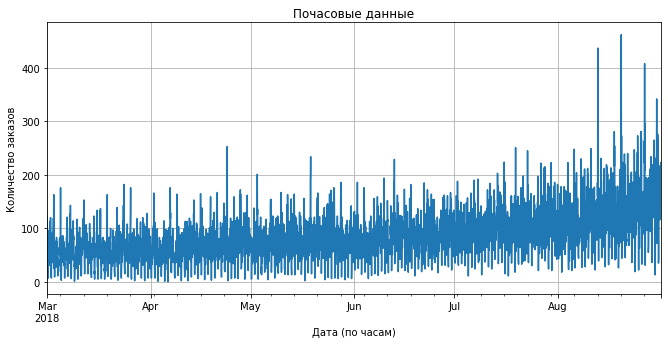

In [12]:
#посмотрим график ресемплированных данных
plot_time_series(taxi_data, 'Почасовые данные', 'Дата (по часам)', 'Количество заказов')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
ОК, выведен график временного ряда (по часам). Рекомедую наложить на него усредненные данные (например за сутки и неделю), это позволит лучше понять данные.
</div>

Разложим временной ряд на составляющие и выделим их:
* trend - тренд;
* seasonal - сезонность;
* resid - остаток.

In [13]:
#раскладываем временной ряд на составляющие и выделяем их
decomposed = seasonal_decompose(taxi_data)

trend = decomposed.trend
seasonal = decomposed.seasonal
resid  = decomposed.resid

Построим графики для составляющих временного ряда.

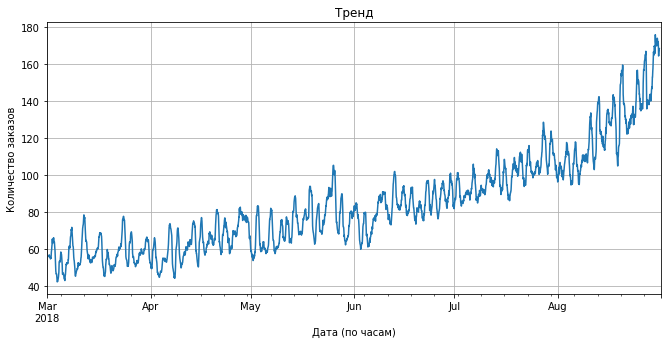

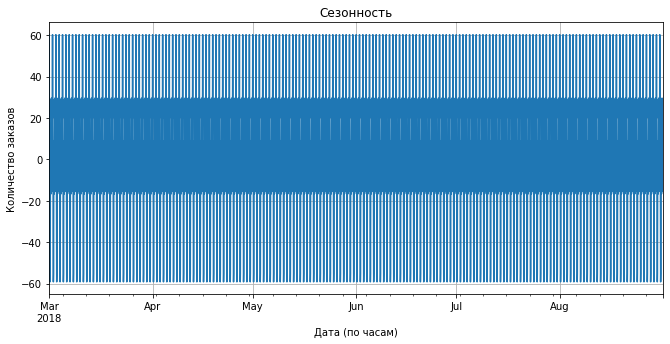

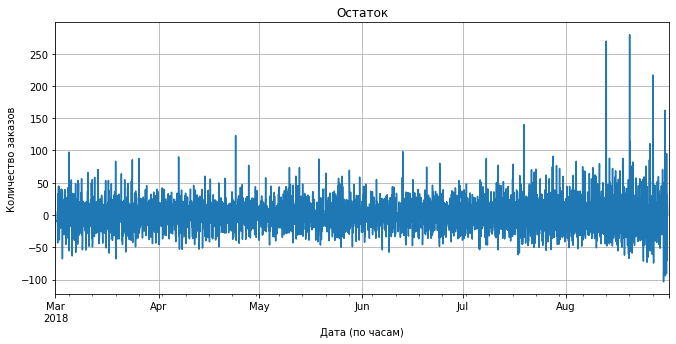

In [14]:
#строим графики полученных составляющих
plot_time_series(trend, 'Тренд', 'Дата (по часам)', 'Количество заказов')
plot_time_series(seasonal, 'Сезонность', 'Дата (по часам)', 'Количество заказов')
plot_time_series(resid, 'Остаток', 'Дата (по часам)', 'Количество заказов')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Есть декомпозиция на тренд и сезонность</div>

На графике тренда явно виден рост количества поездок - имеем восходящий тренд. Однако на графике сезонности ничего не видно - слишком мелкий масштаб. Возьмем данные за неделю - с 20 до 26 августа 2018 года, и за день - понедельник 20 августа 2018 года.

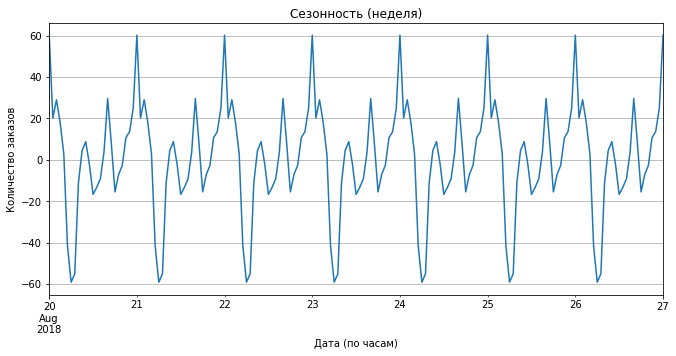

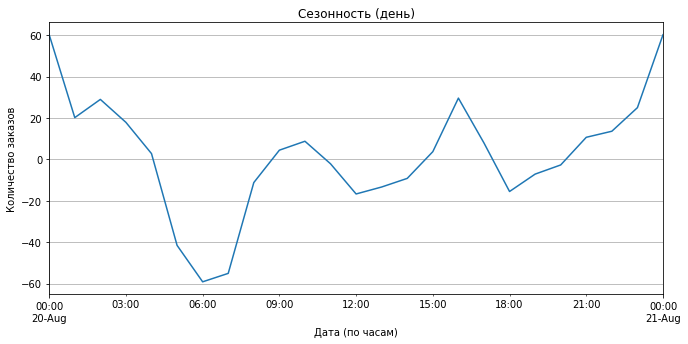

In [15]:
#явно видно рост продаж - восходящий тренд
#однако в таком масштабе не видно сезонность - посмотрим сезонность за неделю, за будний день и за выходной
#неделя - с 20 до 26 августа 2018 года, будний день - среда, 22 августа 2018, выходной - суббота, 25 августа 2018
plot_time_series(seasonal.loc['2018-08-20 00:00:00':'2018-08-27 00:00:00'],
                 'Сезонность (неделя)',
                 'Дата (по часам)',
                 'Количество заказов')
plot_time_series(seasonal.loc['2018-08-20 00:00:00':'2018-08-21 00:00:00'],
                 'Сезонность (день)',
                 'Дата (по часам)',
                 'Количество заказов')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Супер, исследована суточная сезонность. Только хочу обратить твое внимание, что после выполнения декомпозиции в seasonal будет содержаться периодическая компонента, которая абсолютно одинакова для любого периода (в нашем случаеэто сутки).  И это не свойство наших данных (логично предположить,что в суботу и среду они должны быть разными, а свойство инструмента.  Он ищет повторяемые паттерны, остальное уходит в тренд и сезонность. </div>

<div class="alert alert-info">
Оставил два масштаба для сезонности - неделю и день.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Совет: в данных кроме суточной есть недельная сезонность. Чтобы увидеть её нужно сделать ресемплинг данных по суткам и вновь сделать декомпозицию на сезонность и тренд. Дело в том, что seasonal_decompose настраивается на сезонность с самым маленьким циклом, при ресемпле данных по часу это сутки, при ресемпле по суткам это неделя. </div>

По графикам видим наличие суточной сезонности (так как ресемплирование почасовое) и наличие восходящего тренда - количество заказов растёт с начала года. 

Основные пики сезонности: 
* утро - люди едут на работу; 
* вечер - возвращаются с работы;
* ночь - общественный транспорт не работает.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Есть вывод, указано суточная сезонность. Рекомендую также написать про общий тренд (увеличивается или уменьшается количество заказов), а также про недельную сезонность, если ты её исследуешь.</div>

<div class="alert alert-info">
Чуть поправил вывод.
</div>

## Обучение

Создадим дополнительные признаки:
* day - день;
* dayofweek - день недели;
* hour - час.

Год не добавляем - все данные находятся в рамках одного года.

In [16]:
#Добавляем дополнительные признаки - месяц, день, день недели и час, год не добавляем - данные в рамках одного года
#taxi_data['month'] = taxi_data.index.month
#taxi_data['day'] = taxi_data.index.day
taxi_data['dayofweek'] = taxi_data.index.dayofweek
taxi_data['hour'] = taxi_data.index.hour
#посмотрим первые пять строк данных для проверки
display(taxi_data.head())

,num_orders,dayofweek,hour
datetime,,,
2018-03-01 00:00:00,124,3,0
2018-03-01 01:00:00,85,3,1
2018-03-01 02:00:00,71,3,2
2018-03-01 03:00:00,66,3,3
2018-03-01 04:00:00,43,3,4


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
👍 Хорошо, что в признаки ты выносишь час, у нас четкая сезонность внутри суток.
Также очень полезный признак день недели, из нашего опыта это понятно, хоть мы и не делали отдельное исследование.
        
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Предлагаю удалить признак "день", т.к. сезонность внутри месяца мы не обнаружили.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
А вот календарный признак "месяц" нужно удалить.  Данных у нас немного, всего 6 месяцев. При этом данные тренда мы учтем с помощью скользящего среднего и отстающих значений.
</div>


<div class="alert alert-info">
Согласен с обоими замечаниями - на графиках у нас явно видна зависимость в рамках суток от часа и в рамках недели от дня недели. Остальные ничего не дают.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
👍 Идея (совет). Если использовать полученные календарные признаки (час и день недели) как категориальные и перевести их в формат OHE, то точность моделей и предсказаний может повыситься.  
    
Я вижу, что ты делаешь это для Кэтбуста, но может и остальным моделям дать равные шансы?   
    
</div>

<div class="alert alert-info">
В импорты в самом начале добавил OHE и пайплайн - в модели не катбуста (Ridge и RandomForestRegressor) буду в дальнейшем передавать данные через пайплайн с OHE.
</div>

Создадим новые функции - одна для создания новых признаков, вторая для проверки их качества.

In [17]:
#создадим две функции - для создания новых признаков - скользящего среднего и лага; и для их проверки
def make_features(data, max_lag, rolling_mean_size):
    data_copy = data.copy()
    for lag in range(1, max_lag + 1):
        data_copy['lag_{}'.format(lag)] = data_copy['num_orders'].shift(lag)

    data_copy['rolling_mean'] = data_copy['num_orders'].shift().rolling(rolling_mean_size).mean()
    data_copy = data_copy.dropna()
    
    return data_copy

#def eval_features(data, max_lag, rolling_mean_size, model):  
#    data_copy = make_features(data, max_lag, rolling_mean_size)
#    
#    features, target = split_data(data_copy, ['num_orders'])
#    features_train, features_test, target_train, target_test = train_test_split(features,
#                                                                                target, 
#                                                                                shuffle=False,
#                                                                                test_size=0.2)
#    
#    model.fit(features_train, target_train)
#    predictions = model.predict(features_test) 
#    
#    return mean_squared_error(target_test, predictions) ** 0.5

def eval_features(data, max_lag, rolling_mean_size, model):
    data_copy = make_features(data, max_lag, rolling_mean_size)
    features, target = split_data(data_copy, ['num_orders'])
    features_train, features_test, target_train, target_test = train_test_split(features,
                                                                                target, 
                                                                                shuffle=False,
                                                                                test_size=0.2)
    tscv = TimeSeriesSplit(n_splits=5)
    score = cross_val_score(model, features_train, target_train, cv=tscv, scoring='neg_mean_squared_error').mean()
    
    return (-score)**0.5

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
👍 Молодец, что используешь все три типа признаков    
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
👍 Совет - у  mean_squared_error есть аргумент squared, если установить его в значение False, то не нужно будет извлекать квадратный корень.   
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
При оценке моделей ты планируешь использовать тестовую выборку. Но это является грубой ошибкой, использовать тестовую выборку для подбора гиперпараметров или иного улучшения модели нельзя. Используй валидационную выборку или кросс-валидацию.
    
Сразу предупрежу, что при работе с временными рядами нельзя использовать стандартную кросс-валидацию, так как в определенный момент тренировочная выборка окажется позже валидационной. Для решения этой проблемы стоит использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа можно передать в параметр cv в метод основанный на кросс-валидации.
</div>

    tscv = TimeSeriesSplit(n_splits=5)
    gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
    gsearch.fit(X, y)

<div class="alert alert-info">
Согласен, для этого изначально и импортировал TimeSeriesSplit, но где то по пути его потерял с:
    
Функцию eval_features переписал на использование кросс-валидации.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

С помощью этих функций будем предварительно искать лучшие значения максимального среднего и размера выборки скользящего среднего для каждой модели перед подбором параметров.

### RIDGE

In [18]:
%%time
#RIDGE модель

model = Ridge(random_state=RANDOM_STATE)

best_score = 10 ** 6
max_lag_best = None
rolling_mean_size_best = None

for max_lag in [6, 12, 24, 48, 96, 168]:
    for rolling_mean_size in [6, 12, 24, 48, 96, 168]:
        rmse = eval_features(taxi_data, max_lag, rolling_mean_size, model)
        if rmse < best_score: 
            best_score = rmse
            max_lag_best = max_lag
            rolling_mean_size_best = rolling_mean_size

print('Лучшая оценка: {} при параметрах - лаг: {}, размер скользящего среднего: {}'
      .format(best_score, max_lag_best, rolling_mean_size_best))

Лучшая оценка: 21.884275197740347 при параметрах - лаг: 168, размер скользящего среднего: 6
CPU times: user 8.78 s, sys: 18.9 s, total: 27.7 s
Wall time: 27.7 s


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Хорошая идея с подбором размера окна и количества отстающих значений.  Но попробую дать совет: не заниматься линейным перебором, а попробовать опереться на анализ и понимание наших данных.
    
 - Количество экспериментов можно уменьшить, если решить сделать количество отстающих значений равным размеру окна. Это совет, просто моя интуиция. Жестко обосновать не смогу. Но за очень хороший бейзлайн сойдет, от которого можно провести дополнительные исследования. Впрочем можешь перебрать обе переменных независимо.
    
 - В данных есть два цикла - сутки и неделя. Поэтому я бы рекомендовал перебирать следующие значения:
     6/12/24/48/96/168  (четверть суток, половина, сутки, двое, четверо, неделя. При этом "Вангую" что неделя оказется самым лучшим знаением, т.к. учтется и недельная сезонность и тренд  за неделю.
        
</div>

<div class="alert alert-info">
Согласен, возьмём список периодами часов до недели.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

In [19]:
taxi_data_ridge = taxi_data.copy()
taxi_data_ridge = make_features(taxi_data_ridge, 168, 6)
features, target = split_data(taxi_data_ridge, ['num_orders'])
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            shuffle=False,
                                                                            test_size=0.1)

In [22]:
tscv = TimeSeriesSplit(n_splits=5)
pipeline = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore', )),
                     ('model', Ridge(random_state=RANDOM_STATE))])

param_grid = {'model__alpha': [20, 10, 5, 1, 0.1, 0.01, 0.001, 0]}
search_ridge = GridSearchCV(pipeline, param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=False)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Совет  -  в sklearn есть метрика neg_root_mean_squared_error, полный список метрик можешь глянуть по ссылке 
   
    
 https://scikit-learn.org/stable/modules/model_evaluation.html</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
При работе с временными рядами нельзя использовать стандартную кросс-валидацию, так как в определенный момент тренировочная выборка окажется позже валидационной. Для решения этой проблемы стоит использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа можно передать в параметр cv в метод основанный на кросс-валидации.
</div>

    tscv = TimeSeriesSplit(n_splits=5)
    gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
    gsearch.fit(X, y)

<div class="alert alert-info">
Добавил TimeSeriesSplit в кросс-валидацию и пайплайн с OHE.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

In [23]:
%%time
search_ridge.fit(features_train, target_train)

CPU times: user 11.7 s, sys: 9.92 s, total: 21.6 s
Wall time: 21.6 s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('ohe',
                                        OneHotEncoder(handle_unknown='ignore')),
                                       ('model', Ridge(random_state=131296))]),
             param_grid={'model__alpha': [20, 10, 5, 1, 0.1, 0.01, 0.001, 0]},
             scoring='neg_mean_squared_error', verbose=False)

Сохраним статистику модели.

In [24]:
stats = get_model_time_and_rmse(search_ridge)

models_stats.append({'model': 'Ridge',
                     'fit_time': stats.fit_time,
                     'predict_time': stats.predict_time,
                     'RMSE': stats.rmse
                    })

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

### CatBoost

In [25]:
%%time
#CatBoost
#день недели и час - это категориальные признаки
cat_features = ['dayofweek', 'hour']

model = CatBoostRegressor(random_seed=RANDOM_STATE, loss_function='RMSE', silent=True, cat_features=cat_features)

best_score = 10 ** 6
max_lag_best = None
rolling_mean_size_best = None

for max_lag in [6, 12, 24, 48, 96, 168]:
    for rolling_mean_size in [6, 12, 24, 48, 96, 168]:
        rmse = eval_features(taxi_data, max_lag, rolling_mean_size, model)
        if rmse < best_score: 
            best_score = rmse
            max_lag_best = max_lag
            rolling_mean_size_best = rolling_mean_size

print('Лучшая оценка: {} при параметрах - лаг: {}, размер скользящего среднего: {}'
      .format(best_score, max_lag_best, rolling_mean_size_best))

Лучшая оценка: 20.77841280418962 при параметрах - лаг: 168, размер скользящего среднего: 96
CPU times: user 38min 36s, sys: 3min 53s, total: 42min 29s
Wall time: 46min 55s


In [26]:
taxi_data_catboost = taxi_data.copy()
taxi_data_catboost = make_features(taxi_data_catboost, 168, 96)
features, target = split_data(taxi_data_catboost, ['num_orders'])
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            shuffle=False,
                                                                            test_size=0.1)

In [27]:
tscv = TimeSeriesSplit(n_splits=5)
param_grid = {'learning_rate': [0.1, 0.01],
              'depth': [6, 8, 10],
              'iterations': [40, 60]
             }

search_cb = GridSearchCV(model, param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=False)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь тоже утечки при кросс-валидации, используй TimeSeriesSplit

<div class="alert alert-info">
Добавил TimeSeriesSplit в кросс-валидацию.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

In [28]:
%%time
search_cb.fit(features_train, target_train)

CPU times: user 7min 1s, sys: 36 s, total: 7min 37s
Wall time: 8min 28s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=<catboost.core.CatBoostRegressor object at 0x7f118915fd30>,
             param_grid={'depth': [6, 8, 10], 'iterations': [40, 60],
                         'learning_rate': [0.1, 0.01]},
             scoring='neg_mean_squared_error', verbose=False)

Сохраним статистику модели.

In [29]:
stats = get_model_time_and_rmse(search_cb)

models_stats.append({'model': 'CatBoost',
                     'fit_time': stats.fit_time,
                     'predict_time': stats.predict_time,
                     'RMSE': stats.rmse
                    })

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

### RandomForestRegressor

In [31]:
%%time
#RandomForestRegressor
model = RandomForestRegressor(random_state=RANDOM_STATE)

best_score = 10 ** 6
max_lag_best = None
rolling_mean_size_best = None

for max_lag in [6, 12, 24, 48, 96, 168]:
    for rolling_mean_size in [6, 12, 24, 48, 96, 168]:
        rmse = eval_features(taxi_data, max_lag, rolling_mean_size, model)
        if rmse < best_score: 
            best_score = rmse
            max_lag_best = max_lag
            rolling_mean_size_best = rolling_mean_size

print('Лучшая оценка: {} при параметрах - лаг: {}, размер скользящего среднего: {}'
      .format(best_score, max_lag_best, rolling_mean_size_best))

Лучшая оценка: 21.31076114467456 при параметрах - лаг: 168, размер скользящего среднего: 24
CPU times: user 12min 30s, sys: 1.95 s, total: 12min 32s
Wall time: 12min 32s


In [32]:
taxi_data_rfr = taxi_data.copy()
taxi_data_rfr = make_features(taxi_data_rfr, 168, 24)
features, target = split_data(taxi_data_rfr, ['num_orders'])
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            shuffle=False,
                                                                            test_size=0.1)

In [33]:
tscv = TimeSeriesSplit(n_splits=5)
pipeline = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore', )),
                     ('model', RandomForestRegressor(random_state=RANDOM_STATE))])

param_grid = {
    'model__n_estimators': range(10, 51, 10),
    'model__max_depth': range(2, 11, 1)
}

search_rf = GridSearchCV(pipeline, param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=False)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь тоже утечки при кросс-валидации, используй TimeSeriesSplit

<div class="alert alert-info">
Добавил TimeSeriesSplit в кросс-валидацию.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

In [34]:
%%time
search_rf.fit(features_train, target_train)

CPU times: user 10min 19s, sys: 1.78 s, total: 10min 21s
Wall time: 10min 22s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('ohe',
                                        OneHotEncoder(handle_unknown='ignore')),
                                       ('model',
                                        RandomForestRegressor(random_state=131296))]),
             param_grid={'model__max_depth': range(2, 11),
                         'model__n_estimators': range(10, 51, 10)},
             scoring='neg_mean_squared_error', verbose=False)

Сохраним статистику модели.

In [35]:
stats = get_model_time_and_rmse(search_rf)

models_stats.append({'model': 'RandomForestRegressor',
                     'fit_time': stats.fit_time,
                     'predict_time': stats.predict_time,
                     'RMSE': stats.rmse
                    })

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## Тестирование

Соберём статистики моделей в таблицу и выведем её на экран.

In [36]:
display(pd.DataFrame(models_stats))

,model,fit_time,predict_time,RMSE
0,Ridge,0.292017,0.187074,32.238549
1,CatBoost,3.135797,0.010140,23.191616
2,RandomForestRegressor,1.334180,0.064008,34.517100


Лучший результат на тренировочной выборке показала модель CatBoost. Используем её для испытания на тестовой выборке.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [37]:
features, target = split_data(taxi_data_catboost, ['num_orders'])
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            shuffle=False,
                                                                            test_size=0.1)

In [39]:
predictions = search_cb.predict(features_test)
rmse = mean_squared_error(target_test, predictions) ** 0.5
print('RMSE модели CatBoost на тестовой выборке:', rmse)

RMSE модели CatBoost на тестовой выборке: 39.971215923858644


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Нужная метрика на тесте достигнута</div>

Результат испытания модели на тестовой выборке попадают в требования клиента - её значение RMSE меньше, чем 48.

<div class="alert alert-info">
Модель CatBoost с учётом всех правок по ходу проекта показала себя лучше, чем изначальная модель Ridge - связываю это с устранением утечек данных + с лучшим подбором параметров.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

В целом мне все понравилось: твоя работа выполнена на хорошем уровне, ты изучил данные, нашел сезоность и тренды,  корректно подготовил признаки и обучил модели. Также в проекте много графиков и пояснений.

Отличная реализация подбора гиперпараметров для создания признаков.     
    
Есть ряд красный комментариев, связанных с использованием выборок или утечками при кросс-валидации.
    
 - Нужно удалить календарный признак месяц
 - Нельзя использовать тестовую выборку раньше времени
 - Кросс-валидацию на временных рядах нужно производить с осторожностью   
    
    
Желтые комментарии на твое усмотрение.
    
Жду твой проект на финальное ревью :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Дополнительные материалы </b>

Если решишь глубже погрузиться в тему временных рядов, думаю тебе стоит знать что подход, изученный в курсе далеко не единственный. Вот к чему возможно стоит обратиться:
 - Авторегрессионные модели семейства ARIMA. В качестве экскурса очень полезно следующее видео: https://www.youtube.com/watch?v=u433nrxdf5k&t=110s
 - Библиотека prophet от Facebook. По моим наблюдениям, качество решения этой моделью ниже, но она очень проста в применении. https://habr.com/ru/company/ods/blog/323730/
    
 - Урок по временным рядам из курса ML от ODS (https://habr.com/ru/company/ods/blog/327242/)   


</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Привет! Вижу что ты хорошо поработал и проект стал еще лучше ))).


Проект принят. Поздравляю и желаю дальнейших успехов!</div>